In [25]:
%run loadProjectData.ipynb


<Figure size 1400x800 with 0 Axes>

Training data (590540, 434)
Testing data (506691, 433)


In [26]:
categories_dict = {}
for cat in training_data.columns:
    if training_data[cat].dtypes == 'object':
        categories_dict[cat] = list(training_data[cat].unique())
        n_categories = training_data[cat].unique().size
        print("number of categories for variable '{}': {} ".format(cat, n_categories))

number of categories for variable 'ProductCD': 5 
number of categories for variable 'card4': 5 
number of categories for variable 'card6': 5 
number of categories for variable 'P_emaildomain': 60 
number of categories for variable 'R_emaildomain': 61 
number of categories for variable 'M1': 3 
number of categories for variable 'M2': 3 
number of categories for variable 'M3': 3 
number of categories for variable 'M4': 4 
number of categories for variable 'M5': 3 
number of categories for variable 'M6': 3 
number of categories for variable 'M7': 3 
number of categories for variable 'M8': 3 
number of categories for variable 'M9': 3 
number of categories for variable 'id_12': 3 
number of categories for variable 'id_15': 4 
number of categories for variable 'id_16': 3 
number of categories for variable 'id_23': 4 
number of categories for variable 'id_27': 3 
number of categories for variable 'id_28': 3 
number of categories for variable 'id_29': 3 
number of categories for variable 'id_3

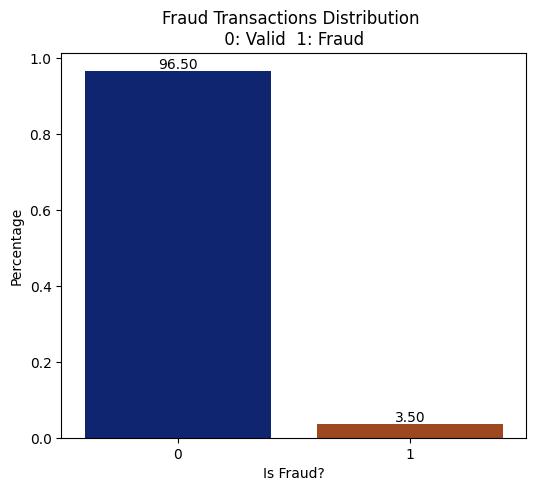

In [3]:
plt.figure(figsize=(6, 5))
yaxis = train_Data['isFraud'].value_counts().values / train_Data.shape[0]
barplot = sns.barplot(x=[0,1], y=yaxis, palette = 'dark')
for p in barplot.patches:
    barplot.annotate(format(p.get_height()*100, '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.title("Fraud Transactions Distribution \n 0: Valid  1: Fraud ")
plt.xlabel('Is Fraud?')
plt.ylabel('Percentage')
plt.show()

Text(0, 0.5, 'Variation')

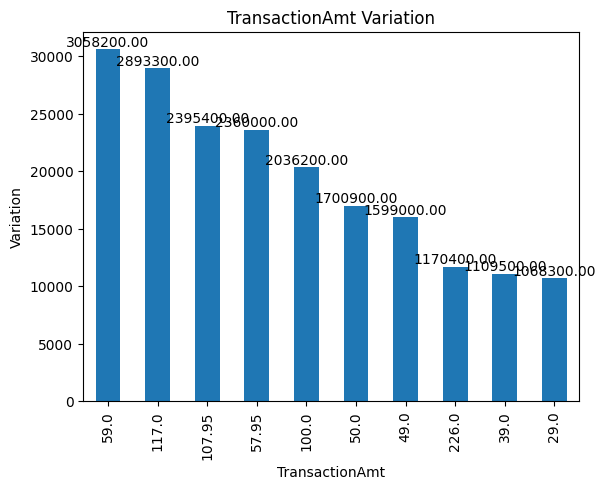

In [4]:
ax = train_Data['TransactionAmt'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='TransactionAmt Variation')
for p in ax.patches:
    ax.annotate(format(p.get_height()*100, '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
ax.set_xlabel('TransactionAmt')
ax.set_ylabel('Variation')

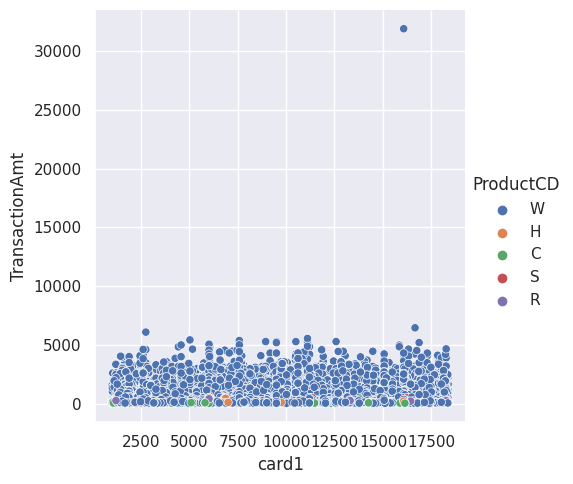

In [5]:

sns.set_theme()

sns.relplot(
    data=training_data,
    x="card1", y="TransactionAmt",
    hue="ProductCD")

In [4]:
%run dataReduction.ipynb

<Figure size 1400x800 with 0 Axes>

Training data (590540, 434)
Testing data (506691, 433)


In [5]:
categories_dict = {}
for cat in training_data.columns:
    if training_data[cat].dtypes == 'object':
        categories_dict[cat] = list(training_data[cat].unique())
        n_categories = training_data[cat].unique().size
        print("number of categories for variable '{}': {} ".format(cat, n_categories))

number of categories for variable 'ProductCD': 5 
number of categories for variable 'card4': 5 
number of categories for variable 'card6': 5 
number of categories for variable 'P_emaildomain': 60 


In [6]:
def get_cat_vis(df, cat, y):
    df = df.copy()
    df['isFraud'] = y
    print('selected feature:', feature)
    print('proportion of Fraud cases')
    multiplers = (df[df['isFraud']==1][cat].value_counts() / df[cat].value_counts()).sort_values(ascending=False).head()
    print(multiplers)
    train= training_data.groupby('isFraud')[cat].value_counts(normalize=True).rename('percentage').mul(100).reset_index().sort_values(cat)
    plt.figure(figsize=(10,6))
    barplot = sns.barplot(x=cat, y="percentage", hue="isFraud", data=train, palette = 'pastel')
    plt.legend()
    plt.ylabel('percentage of transaction frequency')
    plt.xlabel(cat)
    plt.title('Percentage of Fraudulent and Valid transactions frequency in Training Dataset')
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    plt.show()

selected feature: ProductCD
proportion of Fraud cases
C    0.116873
S    0.058996
H    0.047662
R    0.037826
W    0.020399
Name: ProductCD, dtype: float64


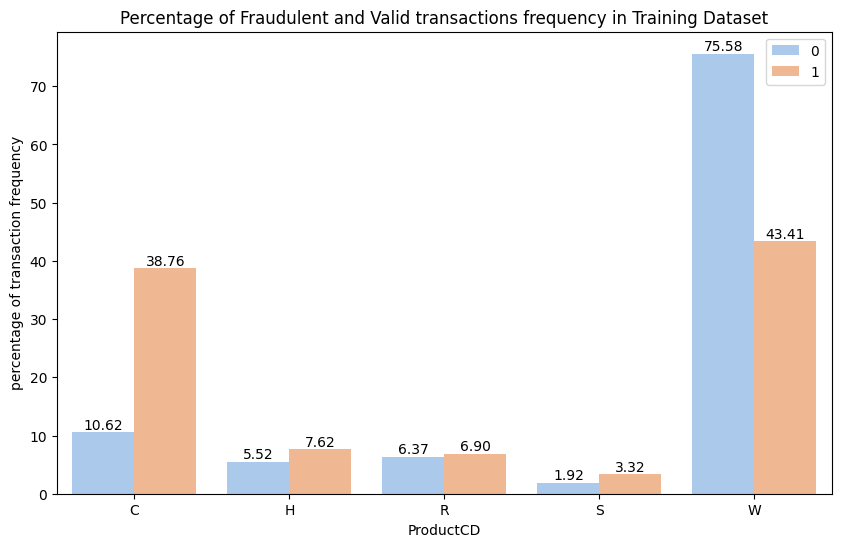

In [7]:
cat_list = list(categories_dict.keys())
feature = cat_list[0]
get_cat_vis(training_data, feature, training_data['isFraud'])


In [34]:
cat_list = list(categories_dict.keys())

selected feature: card4
proportion of Fraud cases
discover            0.077282
visa                0.034756
mastercard          0.034331
american express    0.028698
Name: card4, dtype: float64


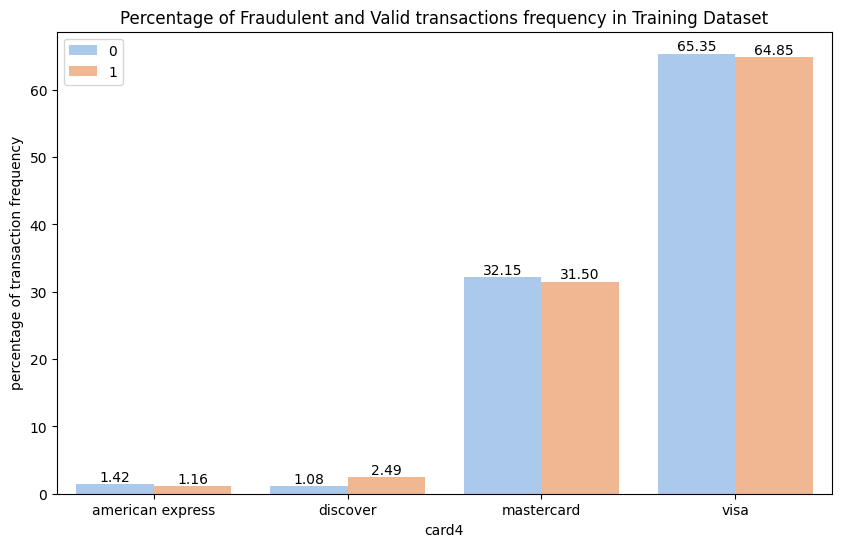

In [9]:
feature = cat_list[1]
get_cat_vis(training_data, feature, training_data['isFraud'])

selected feature: card6
proportion of Fraud cases
credit             0.066785
debit              0.024263
charge card             NaN
debit or credit         NaN
Name: card6, dtype: float64


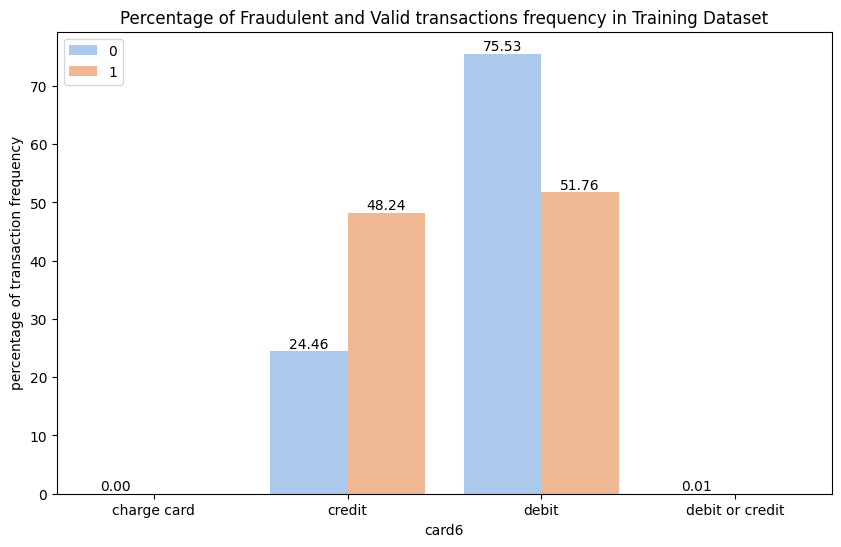

In [10]:
feature = cat_list[2]
get_cat_vis(training_data, feature, training_data['isFraud'])

selected feature: P_emaildomain
proportion of Fraud cases
protonmail.com    0.407895
mail.com          0.189624
outlook.es        0.130137
aim.com           0.126984
outlook.com       0.094584
Name: P_emaildomain, dtype: float64


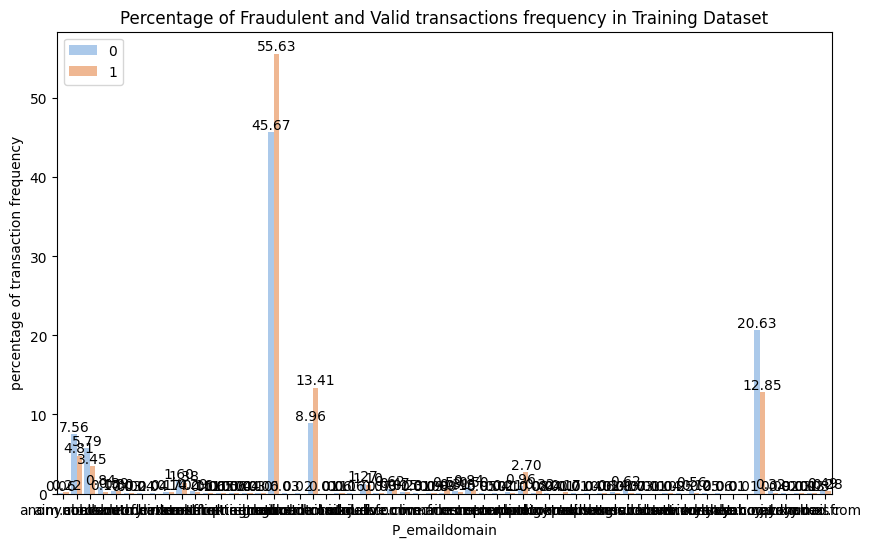

In [11]:
feature = cat_list[3]
get_cat_vis(training_data, feature, training_data['isFraud'])

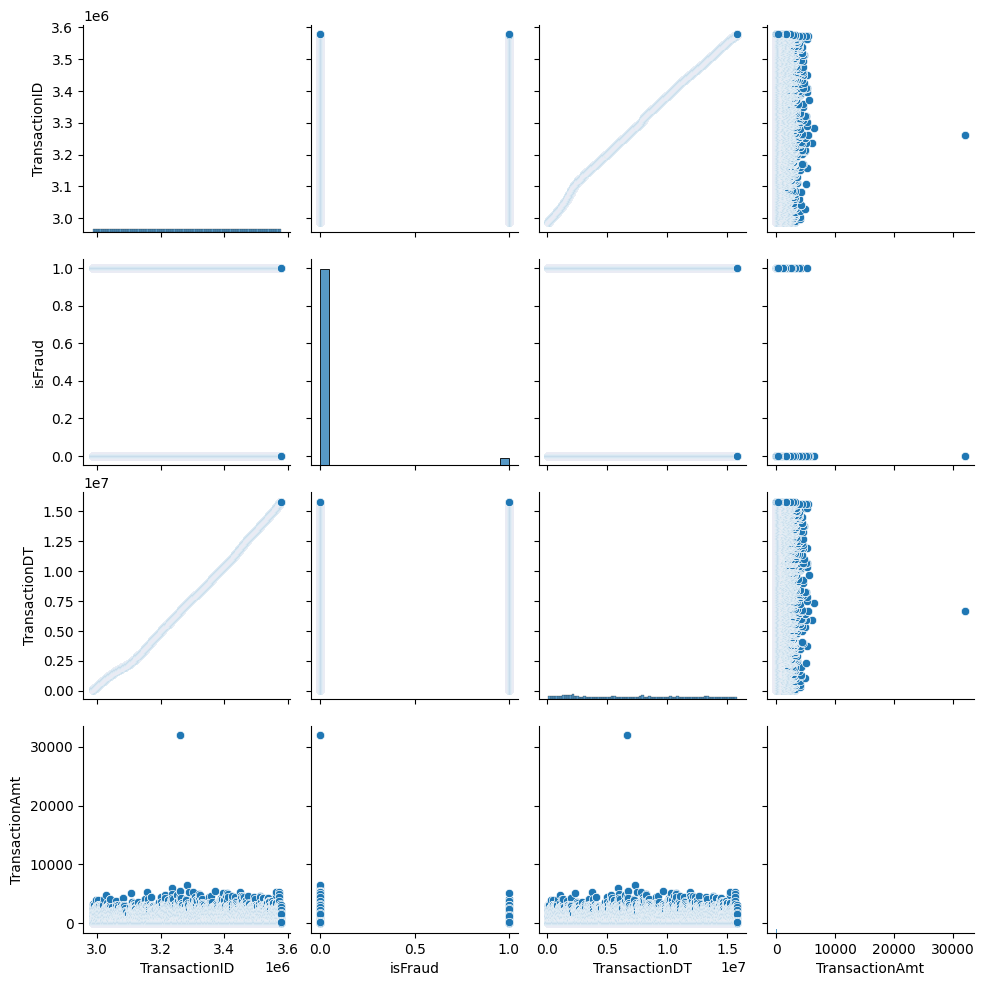

In [12]:
columns_to_include = ['TransactionID',
 'isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD']

sns.pairplot(data=training_data[columns_to_include])
plt.show()

In [13]:
y=training_data['isFraud']

In [14]:
def plot_dist(feature, target, name, xlabel, kde = True):
    fig, axes = plt.subplots(1,2,figsize=(15,5))
    ax1, ax2 = axes[0], axes[1]

    ax1 = sns.distplot( feature, hist=True, kde=kde, bins=int(180/5), ax=ax1 )
    ax1.set_ylabel('frequency and KDE')
    ax1.set_xlabel(xlabel)
    ax1.set_title('{} histogram'.format(xlabel));

    ax2 = sns.kdeplot(feature[(target == 0) ],
                    color="Red", shade = True, ax = ax2)
    ax2 = sns.kdeplot(feature[(target == 1) ],
                    color="Blue", shade= True, ax = ax2)
    ax2.legend(["Valid", "Fraud"], loc='upper right')
    ax2.set_ylabel('Density')
    ax2.set_xlabel('{}'.format(xlabel))
    ax2.set_title('Density function of {}'.format(xlabel));

/tmp/ipykernel_16212/3847090960.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot( feature, hist=True, kde=kde, bins=int(180/5), ax=ax1 )
/tmp/ipykernel_16212/3847090960.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax2 = sns.kdeplot(feature[(target == 0) ],
/tmp/ipykernel_16212/3847090960.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax2 = sns.kdeplot(feature[(target == 1) ],


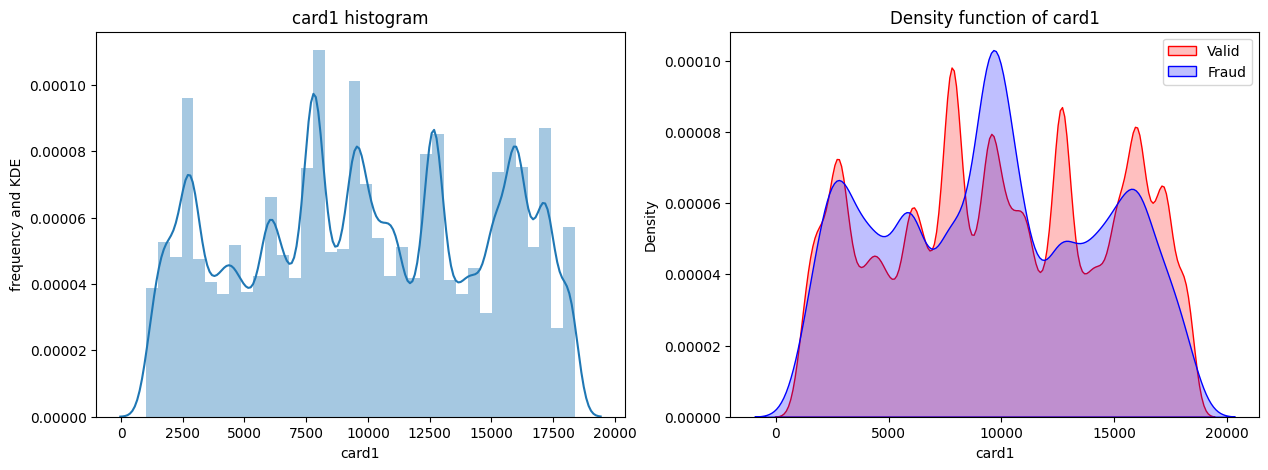

In [15]:
var_name = 'card1'
plot_dist(training_data[var_name], y, var_name, xlabel = 'card1')

/tmp/ipykernel_16212/3847090960.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot( feature, hist=True, kde=kde, bins=int(180/5), ax=ax1 )
/tmp/ipykernel_16212/3847090960.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax2 = sns.kdeplot(feature[(target == 0) ],
/tmp/ipykernel_16212/3847090960.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax2 = sns.kdeplot(feature[(target == 1) ],


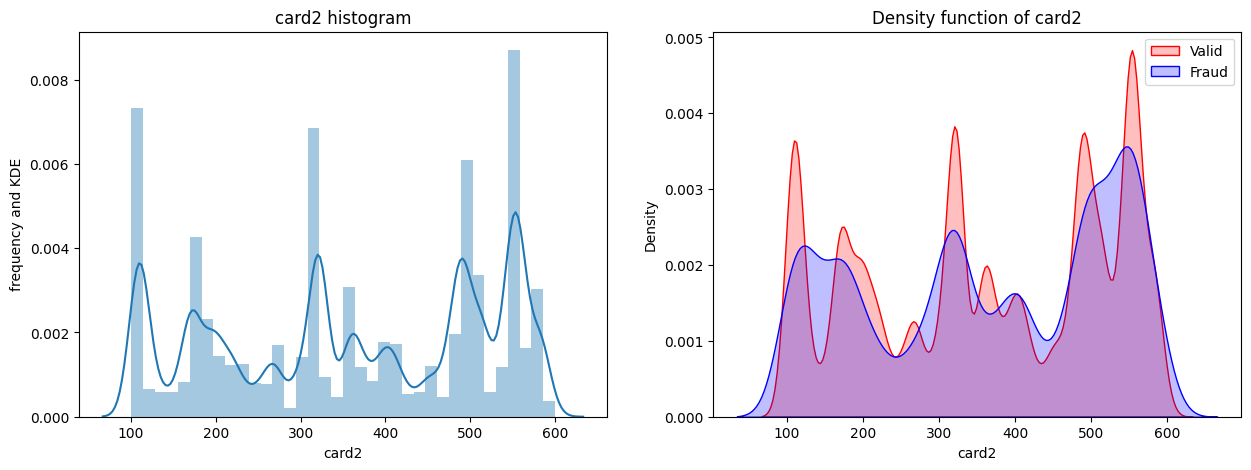

In [16]:
var_name = 'card2'
plot_dist(training_data[var_name], y, var_name, xlabel = 'card2')

/tmp/ipykernel_16212/3847090960.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot( feature, hist=True, kde=kde, bins=int(180/5), ax=ax1 )
/tmp/ipykernel_16212/3847090960.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax2 = sns.kdeplot(feature[(target == 0) ],
/tmp/ipykernel_16212/3847090960.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax2 = sns.kdeplot(feature[(target == 1) ],


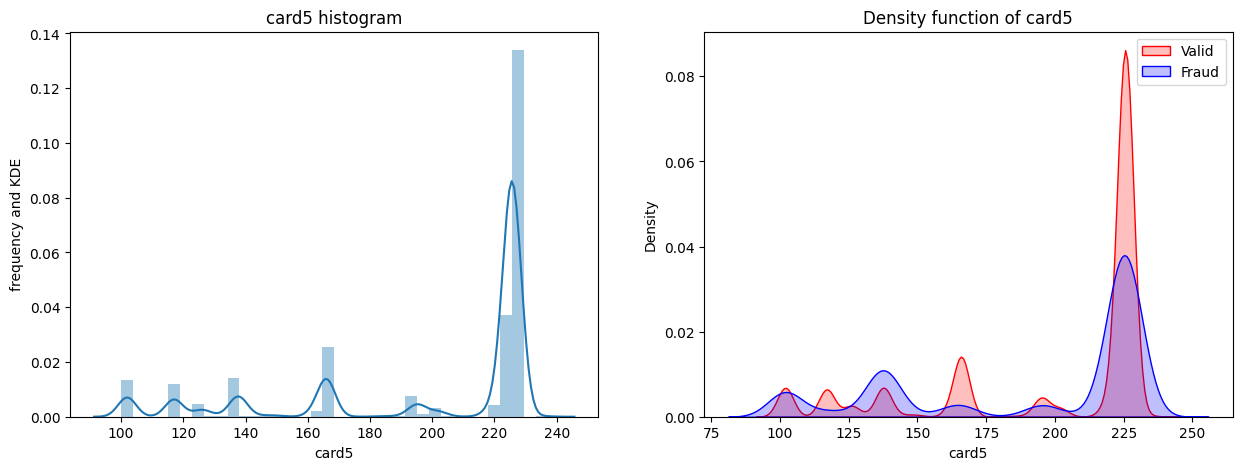

In [17]:
var_name = 'card5'
plot_dist(training_data[var_name], y, var_name, xlabel = 'card5')

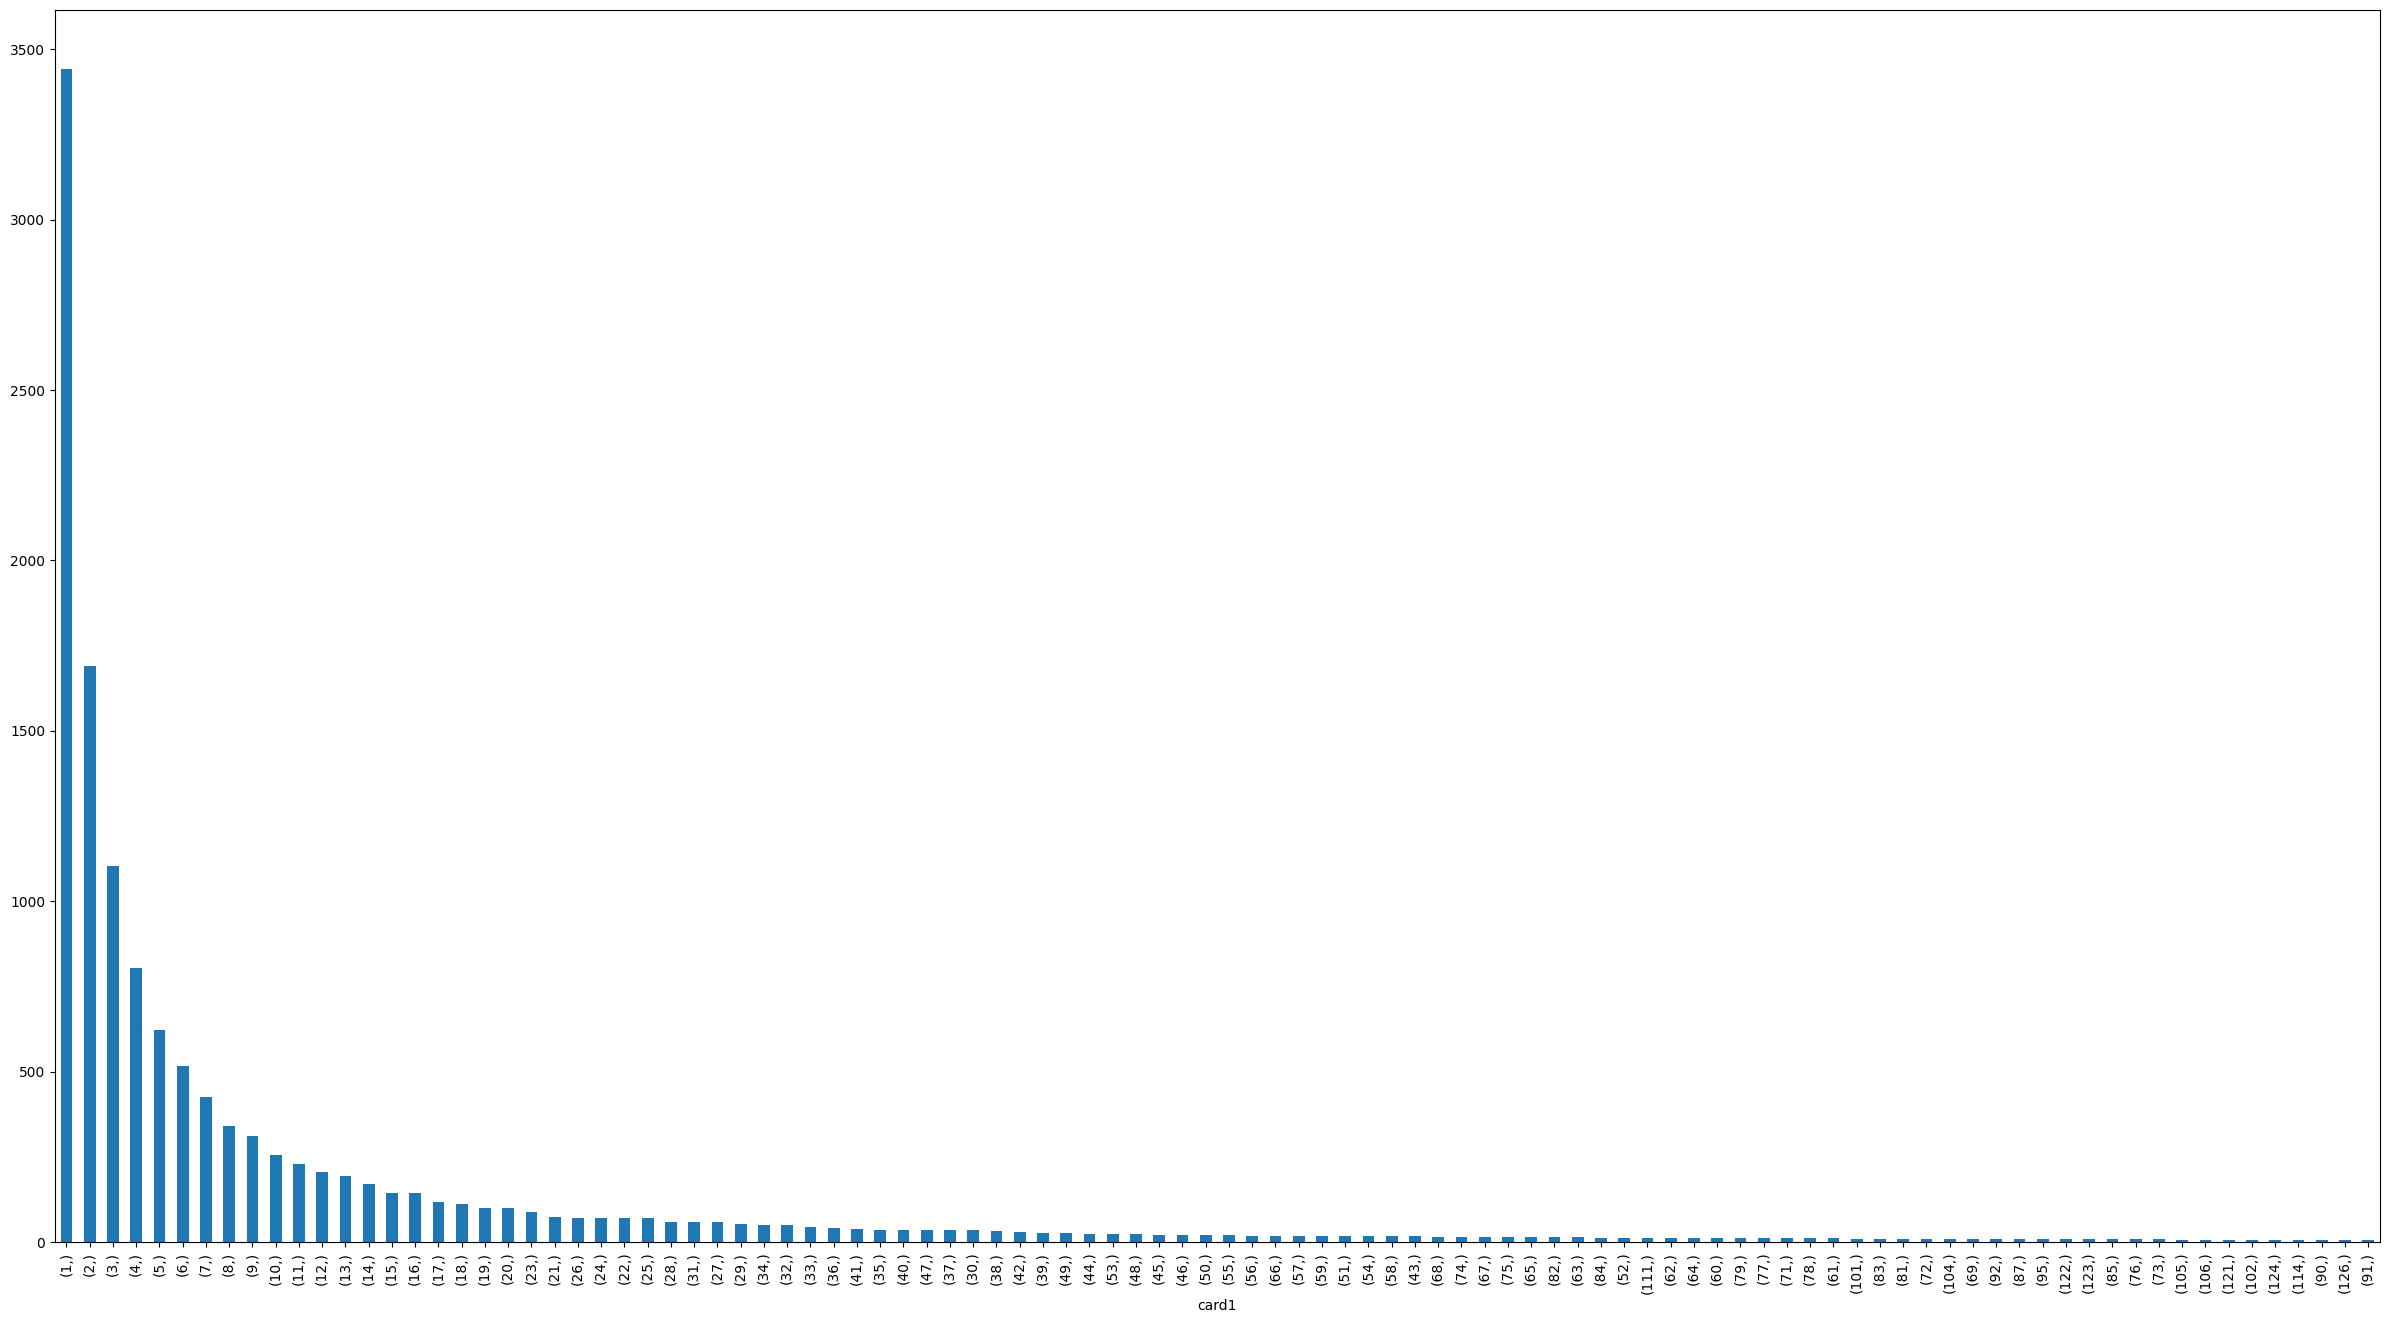

In [18]:
plt.figure(figsize=(30,16))
training_data.card1.value_counts().to_frame().value_counts().head(100).plot.bar();

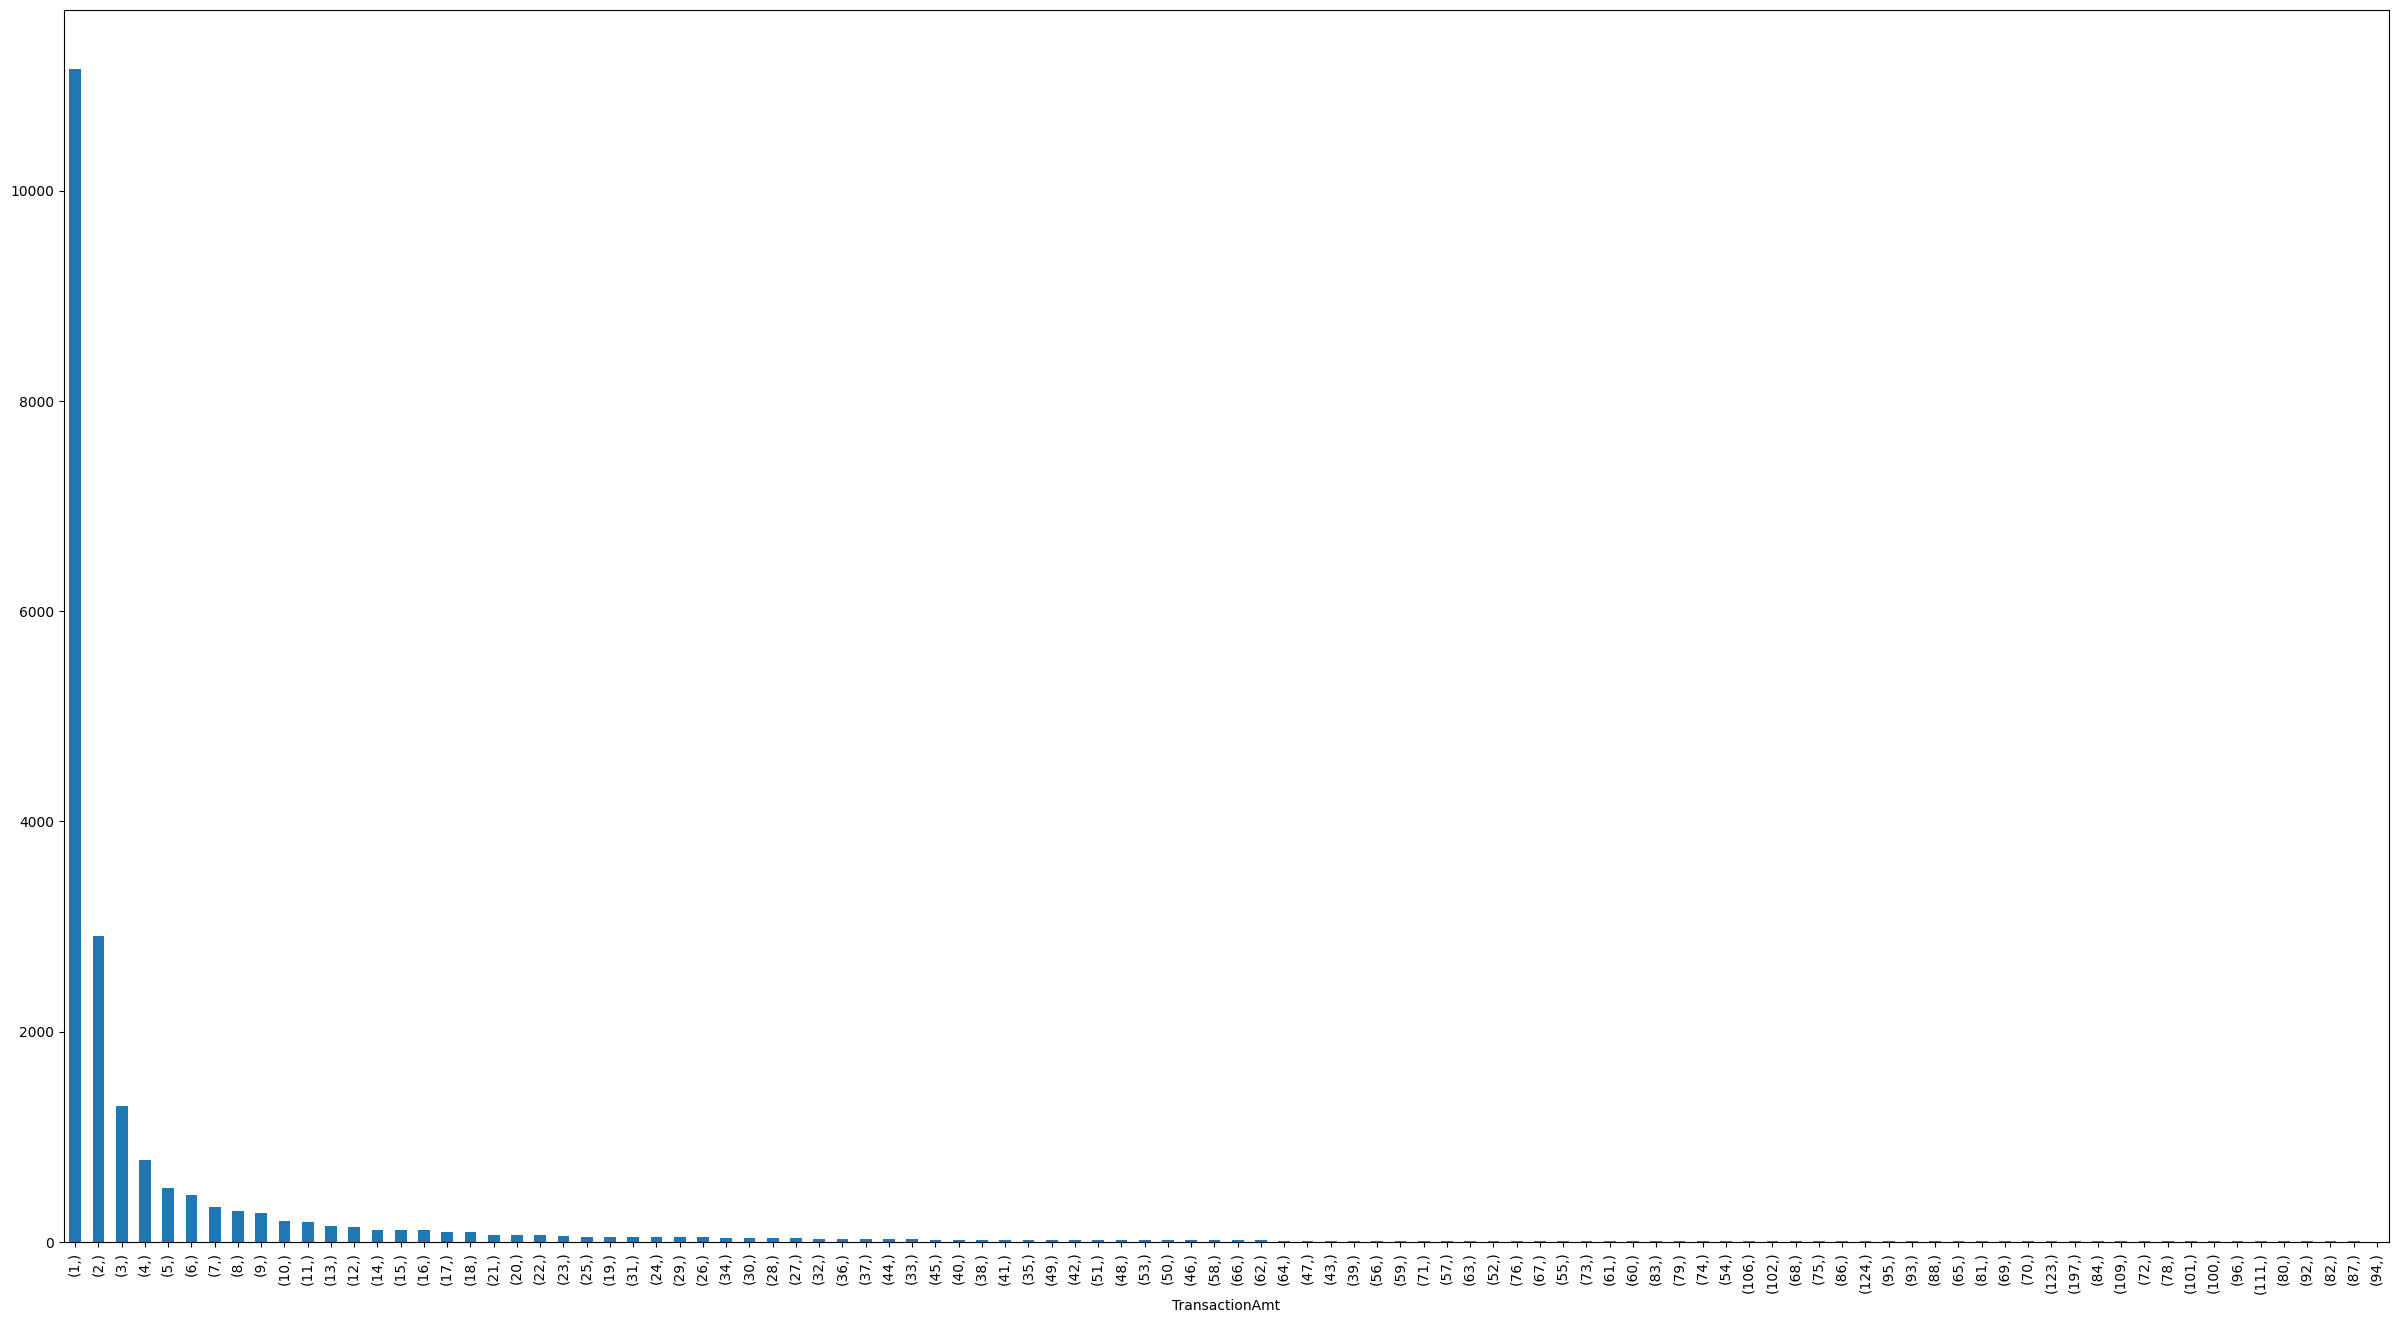

In [19]:
plt.figure(figsize=(30,16))
training_data.TransactionAmt.value_counts().to_frame().value_counts().head(100).plot.bar();

In [20]:
#obtaining card and fraud counts from the training dataset
card_counts = training_data['card4'].value_counts()
fraud_counts = training_data[training_data['isFraud'] == 1]['card4'].value_counts()

# Calculate valid counts by taking the difference of total fraud counts from total card counts
valid_counts = card_counts - fraud_counts

# Display the counts
print("Fraud Cases:")
print(fraud_counts)
print("\nValid Cases:")
print(valid_counts)

Fraud Cases:
visa                13373
mastercard           6496
discover              514
american express      239
Name: card4, dtype: int64

Valid Cases:
american express      8089
discover              6137
mastercard          182721
visa                371394
Name: card4, dtype: int64


Fraud Probabilities :  card4
american express    0.028698
discover            0.077282
mastercard          0.034331
visa                0.034756
Name: isFraud, dtype: float64


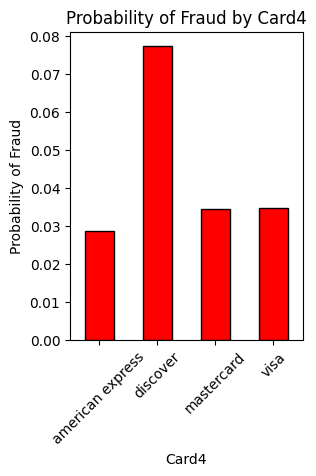

In [27]:

# Calculate the probability of fraud for each card
fraud_probabilities = training_data.groupby('card4')['isFraud'].mean()
print("Fraud Probabilities : ",fraud_probabilities)

# Plot the probabilities
plt.figure(figsize=(3, 4))

fraud_probabilities.plot(kind='bar', color='red', edgecolor='black')
plt.xlabel('Card4')
plt.ylabel('Probability of Fraud')
plt.title('Probability of Fraud by Card4')
plt.xticks(rotation=45)
plt.show()

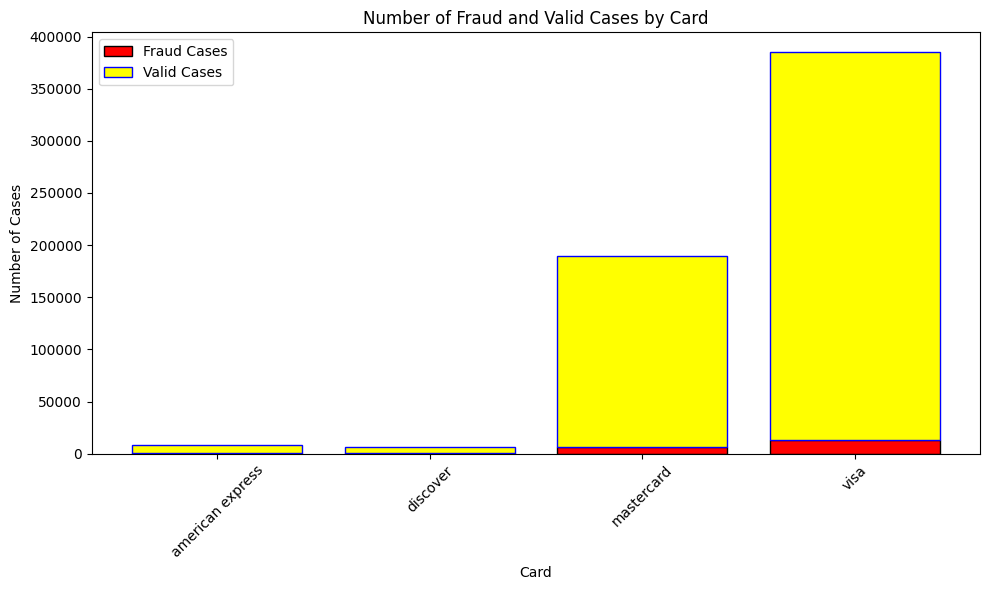

In [22]:
fraud_counts = training_data.groupby('card4')['isFraud'].sum()
valid_counts = training_data.groupby('card4')['isFraud'].size() - fraud_counts

# Plot the counts in a bar graph
plt.figure(figsize=(10, 6))
plt.bar(fraud_counts.index, fraud_counts.values, label='Fraud Cases', color='red', edgecolor='black')
plt.bar(valid_counts.index, valid_counts.values, bottom=fraud_counts.values, label='Valid Cases', color='yellow', edgecolor='blue')

plt.xlabel('Card')
plt.ylabel('Number of Cases')
plt.title('Number of Fraud and Valid Cases by Card')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:


#obtaining card and fraud counts from the training dataset
total_counts = training_data['P_emaildomain'].value_counts()
fraud_counts = training_data[training_data['isFraud'] == 1]['P_emaildomain'].value_counts()

# Calculate valid counts by taking the difference of total fraud counts from total counts
valid_counts = total_counts - fraud_counts

# Display the counts
print("Fraud Cases:")
print(fraud_counts)
print("\nValid Cases:")
print(valid_counts)

Fraud Cases:
gmail.com          9943
hotmail.com        2396
yahoo.com          2297
anonymous.com       859
aol.com             617
outlook.com         482
comcast.net         246
icloud.com          197
mail.com            106
msn.com              90
live.com             84
outlook.es           57
bellsouth.net        53
ymail.com            50
live.com.mx          41
aim.com              40
protonmail.com       31
att.net              30
cox.net              29
me.com               27
charter.net          25
verizon.net          22
hotmail.es           20
optonline.net        17
yahoo.com.mx         16
mac.com              14
sbcglobal.net        12
earthlink.net        11
gmail                11
embarqmail.com        9
frontier.com          8
juno.com              6
yahoo.fr              5
frontiernet.net       5
suddenlink.net        4
roadrunner.com        3
cableone.net          3
rocketmail.com        2
yahoo.es              2
sc.rr.com             1
netzero.net           1
pro

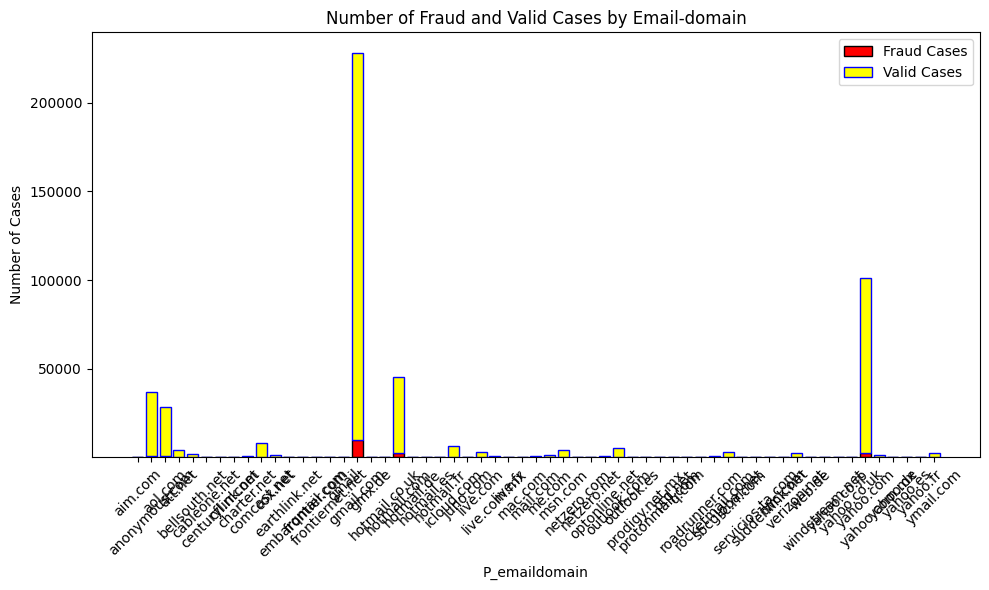

In [24]:
fraud_counts = training_data.groupby('P_emaildomain')['isFraud'].sum()
valid_counts = training_data.groupby('P_emaildomain')['isFraud'].size() - fraud_counts

# Plot the counts in a bar graph
plt.figure(figsize=(10, 6))
plt.bar(fraud_counts.index, fraud_counts.values, label='Fraud Cases', color='red', edgecolor='black')
plt.bar(valid_counts.index, valid_counts.values, bottom=fraud_counts.values, label='Valid Cases', color='yellow', edgecolor='blue')

plt.xlabel('P_emaildomain')
plt.ylabel('Number of Cases')
plt.title('Number of Fraud and Valid Cases by Email-domain')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

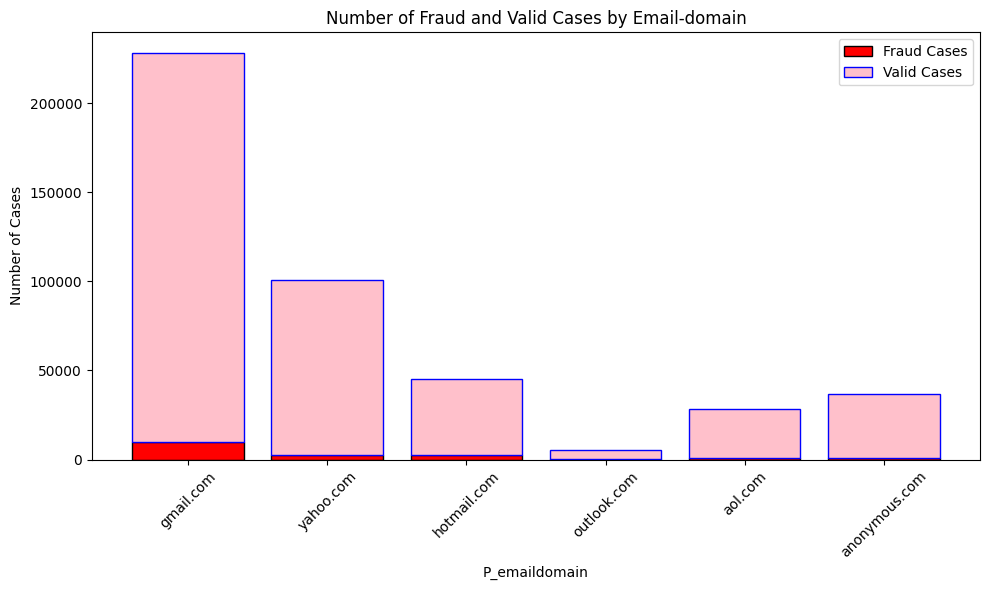

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by 'P_emaildomain' and calculate the fraud and valid counts
fraud_counts = training_data.groupby('P_emaildomain')['isFraud'].sum()
valid_counts = training_data.groupby('P_emaildomain')['isFraud'].size() - fraud_counts

# Select only a few email domains to plot
selected_emails = ['gmail.com', 'yahoo.com', 'hotmail.com', 'outlook.com','aol.com','anonymous.com']

# Filter the data to include only the selected email domains
fraud_counts = fraud_counts[selected_emails]
valid_counts = valid_counts[selected_emails]

# Plot the counts in a bar graph
plt.figure(figsize=(10, 6))
plt.bar(fraud_counts.index, fraud_counts.values, label='Fraud Cases', color='red', edgecolor='black')
plt.bar(valid_counts.index, valid_counts.values, bottom=fraud_counts.values, label='Valid Cases', color='pink', edgecolor='blue')

plt.xlabel('P_emaildomain')
plt.ylabel('Number of Cases')
plt.title('Number of Fraud and Valid Cases by Email-domain')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
